Imports
Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:

python: asegúrense de usar la versión 3+.  
mesa: el framework de Python para el modelado de agentes.  
numpy: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.  
matplotlib: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.  
Para poder modelar a los integrantes de nuestro sistema usando el framework de mesa es necesario importar dos clases: una para el modelo general, y otro para los agentes.  

In [40]:
#IMPORTS DEL REPO DEL PROFE#

from mesa import Agent, Model
from mesa.time import RandomActivation

# For a jupyter notebook add the following line:
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

In [41]:
class MoneyAgent(Agent):
    def __init__(self, id, model):
        super().__init__(id, model)
        self.wealth = 1
    
    def step(self):
        if self.wealth == 0:
            return
        
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1

In [42]:
class MoneyModel(Model):
    def __init__(self, num_agents):
        self.schedule = RandomActivation(self)
        
        for i in range(num_agents):
            agent = MoneyAgent(i, self)
            self.schedule.add(agent)
            
    def step(self):
        self.schedule.step()

In [43]:
NUM_AGENTS = 10
MAX_ITERATIONS = 10

model = MoneyModel(NUM_AGENTS)
for i in range(MAX_ITERATIONS):
    model.step()

(array([5., 0., 0., 2., 0., 0., 1., 0., 0., 2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

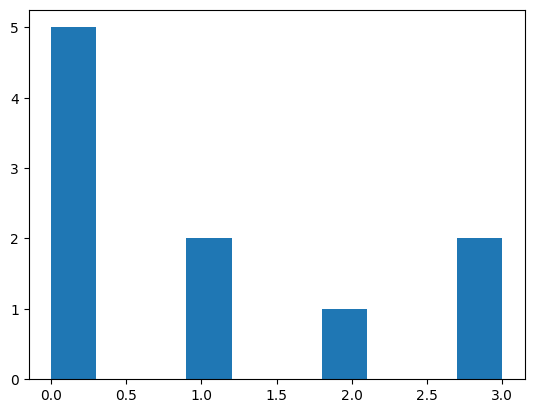

In [44]:
agent_wealth = [agent.wealth for agent in model.schedule.agents]
plt.hist(agent_wealth)